In [ ]:

# !pip install torch===1.5.1 torchvision===0.6.1 -f https://download.pytorch.org/whl/torch_stable.html

# These imports help us create models and datasets
# import torch

In [50]:
#!/usr/bin/python
import pandas as pd
import numpy as np
import scipy.io
import glob
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt 

mypath = 'C:/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/ContenSimilarityTest/images.mat'
# mypath = 'C:/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/ContenSimilarityTest/images_Landmass.mat'


# Test
# dirs = os.listdir( mypath )
# This would print all the files and directories
# for file in dirs:
#     print file name
#     print(file)
#     print file path
#     print(join(mypath, file))


Shape of data array:  (40,)


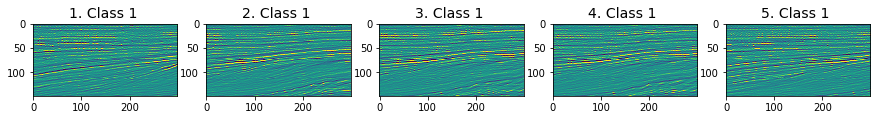

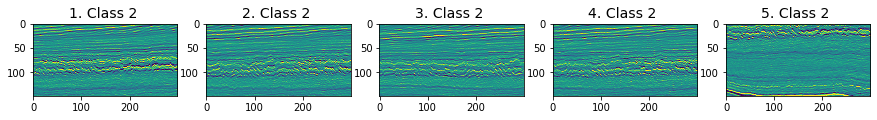

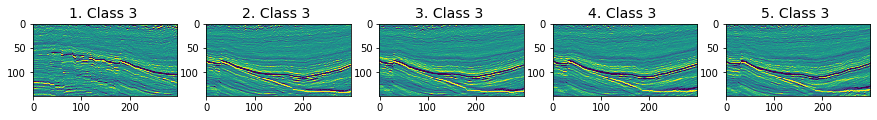

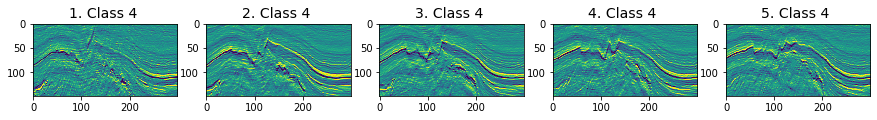

There are 40 texture images. Each image has dimension:  (150, 300)


In [59]:
list_data = scipy.io.loadmat(mypath)['images']
# print(list_data[0][0])
array_data = np.array(list_data[0][:])
print('Shape of data array: ', array_data.shape)
# print(list_data['images'][:,n])
fig, axarr = plt.subplots(1, 5, figsize=(15, 15))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n])
    ax.set_title("%i. " % (n+1) + "Class 1 " , fontsize=14)
plt.show()
fig, axarr = plt.subplots(1, 5, figsize=(15, 15))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n+10])
    ax.set_title("%i. " % (n+1) + "Class 2 ", fontsize=14)
plt.show()
fig, axarr = plt.subplots(1, 5, figsize=(15, 15))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n+20])
    ax.set_title("%i. " % (n+1) + "Class 3 ", fontsize=14)
plt.show()
fig, axarr = plt.subplots(1, 5, figsize=(15, 15))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n+30])
    ax.set_title("%i. " % (n+1) + "Class 4 ", fontsize=14)
plt.show()
print('There are', len(array_data), 'texture images. Each image has dimension: ', array_data[0].shape)


In [58]:
NumOfClasses = 4
# M is total num of images
M = array_data.shape[0]
SimilarityMatrix = np.zeros((M,M))
print('Calculating Similarity: 0.00%')
Num = '0.00%'
# for i=1:M
#         for j = i:M
#             SimilarityMatrix(i,j) = TextureSimilarity(images{i},images{j}); 
#             c = c+1; 
#             Str = repmat('\b',1,length(Num)-1); 
#             Num = [num2str(c/(M*(M-1)/2+M)*100,'%0.2f'),'%%'];
#             temp = [Str,Num];  
#             fprintf(temp);
#         end    
#     end 

Calculating Similarity: 0.00%


In [67]:
from scipy.fftpack import ifftshift, fft2, fftshift
from math import ceil,floor

In [72]:
x = array_data[0]
np.sqrt(np.prod(x.shape))
X = fftshift(fft2(ifftshift(x)))/np.sqrt(np.prod(x.shape))
# def fdct_wrapping(x, is_real, finest, nbscales, nbangles_coarse)

array([[ 0.00972684-1.67476529e-17j, -0.01364514+7.21654993e-03j,
        -0.00637368+4.62212662e-03j, ..., -0.01920601+1.02784274e-02j,
        -0.00637368-4.62212662e-03j, -0.01364514-7.21654993e-03j],
       [ 0.00243439-3.29163901e-03j,  0.01173019-3.35008955e-04j,
         0.00402527-3.47619045e-03j, ...,  0.00739024-3.26668644e-03j,
         0.00474322+4.00066116e-04j,  0.00429835+8.93509457e-03j],
       [-0.00036469-9.81163750e-03j, -0.00989181+1.02640105e-02j,
        -0.00628821+6.27403293e-03j, ..., -0.01412041+6.66387270e-03j,
         0.00148334-4.75312927e-03j, -0.01486315-1.05093621e-03j],
       ...,
       [-0.00288375+8.98463130e-03j,  0.00642056-1.57609738e-02j,
         0.00583668-7.16435673e-03j, ...,  0.01027836-1.43477328e-02j,
         0.00408863+7.64578267e-03j,  0.01500843+4.35843685e-03j],
       [-0.00036469+9.81163750e-03j, -0.01486315+1.05093621e-03j,
         0.00148334+4.75312927e-03j, ..., -0.01161344+6.01323452e-03j,
        -0.00628821-6.27403293e-03j

In [ ]:
function Demo_Retrieval()
    clc; 
    load images 
    NumOfClasses = 4; 
    M = size(images,2);
    S = M/NumOfClasses; %number of samples per class 
    SimilarityMatrix = zeros(M,M); 

    fprintf('Calculating Similarity: 0.00%%')
    Num = '0.00%%'; 
    c = 0; 
    for i=1:M
        for j = i:M
            SimilarityMatrix(i,j) = TextureSimilarity(images{i},images{j}); 
            c = c+1; 
            Str = repmat('\b',1,length(Num)-1); 
            Num = [num2str(c/(M*(M-1)/2+M)*100,'%0.2f'),'%%'];
            temp = [Str,Num];  
            fprintf(temp);
        end    
    end 
    SimilarityMatrix = SimilarityMatrix + triu(SimilarityMatrix,1)'; 
    results = CalcStatistics(SimilarityMatrix,NumOfClasses);
    fprintf('\n');
    fprintf('Precision @1 = %0.2f%%\n',results.PAn(1)*100)
    fprintf('Mean Reciprocal Rank = %0.2f%%\n',results.MRR*100)
    fprintf('Retrieval Accuracy = %0.2f%%\n',results.PAn(end)*100)
    fprintf('Mean Averge Precision = %0.2f%%\n',results.MAP*100)
    %%
    CC = hsv(NumOfClasses);
    C = CC(floor(([1:M]'-1)/(M/NumOfClasses))+1,:);
	[Y, E] = cmdscale(1-SimilarityMatrix,3);
    for i=1:NumOfClasses
        scatter3(Y((i-1)*S+1:i*S,1),Y((i-1)*S+1:i*S,2),Y((i-1)*S+1:i*S,3),30,'o','MarkerFaceColor','flat'); 
        title('Visualization of the data points');
        hold on 
    end
   
   legend('Class 1','Class 2','Class 3','Class 4') 
end 

In [ ]:
class MyDataset(Dataset):
    def __init__(self, mat_path):
        data = io.loadmat(mat_path)
        self.images = torch.from_numpy(data['images'])
        self.targets = torch.from_numpy(data['tumorMask'])

    def __getitem__(self, index):
        x = self.images[index]
        y = self.targets[index]
        return x, y

    def __len__(self):
        return len(self.images)


In [ ]:
# Get a list of string
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))] 
